# Дерево решений ID3

In [563]:
import pandas as pd
import math
from graphviz import Digraph

TARGET_COLUMN = 'os'

In [564]:
data = pd.read_csv("editor_corrected.csv")
data.head()

,editor,lang,drink,os
0,jupyter,Kotlin,coffee,windows
1,jupyter,Python,tea,mac
2,jupyter,Python,tea,mac
3,jupyter,Python,coffee,mac
4,jupyter,Python,coffee,mac


## Алгоритм ID3

In [565]:
class Node(object):
    """
    Простое дерево
    """
    def __init__(self):
        self.value = None
        self.edge = None # Название ребра, которое ведёт в данный узел
        self.childs = []

In [566]:
def getEntropy(counts):
    """
    Вычисление энтропии по последовательности с количествами различных классов
    """
    entropy = 0
    n = sum(counts)
    for cnt in counts:
        if cnt != 0:
            entropy += -cnt/n * math.log(cnt/n, 2)

    return entropy

In [567]:
def getInformationGain(dataset, target_name, attr_name):
    """
    Вычисление information gain для конкретного атрибута
    """
    counts = dataset[target_name].value_counts()
    n = sum(counts)
    entropy = getEntropy(counts)
    
    values = dataset[attr_name].unique()
    av_info_entropy = 0
   
    for value in values:
        partitioned = dataset[dataset[attr_name]==value]
        attr_entropy = getEntropy(partitioned[target_name].value_counts())
        av_info_entropy += (partitioned.shape[0]/n) * attr_entropy
        
    return entropy - av_info_entropy
    

In [568]:
def getAttributeMaxInformationGain(dataset, target_name, attributes):
    """
    Вычисление атрибута с максимальным приростом информации
    """
    attributes = [attr for attr in dataset if attr != target_name]
    gains = [getInformationGain(dataset, target_name, attr_name) for attr_name in attributes]
    return attributes[gains.index(max(gains))]

In [569]:
def getID3Tree(iteration, dataset, target_name, attributes, root=Node()):
    """ 
    Функция генерации ID3 дерева 
    """
    if iteration > 100:
        print(dataset)
        print(attributes)
        return
    
    if dataset[target_name].nunique() == 1:
        root.value = dataset[target_name].unique()[0]
        return root
    if len(attributes) == 0:
        root.value = dataset[target_name].value_counts().idxmax()
        return root
    
    bestAttrName = getAttributeMaxInformationGain(dataset, target_name, attributes)
    root.value = bestAttrName
    
    attr_values = dataset[bestAttrName].unique()
    
    for value in attr_values:
        child_node = Node()
        child_node.edge = value
        root.childs.append(child_node)
        childDataSet = dataset[dataset[bestAttrName]==value]
        
        if childDataSet.shape[0] == 0:
            child.value = dataset[target_name].value_counts().idxmax()
        else:
            next_lev_attrs = [attr for attr in attributes if attr != bestAttrName]
            getID3Tree(iteration + 1, childDataSet, target_name, next_lev_attrs, child_node)
        
    return root

In [570]:
attributes = [attr for attr in data.columns if attr != TARGET_COLUMN]
root = getID3Tree(0, data, TARGET_COLUMN, attributes)

## Рисуем дерево

In [571]:
dot = Digraph(comment='ID3')

In [572]:
def fill_visual_graph(dot, root):
    """
    Заполняем граф для отображения
    """
    dot.node(str(id(root)), root.value)
    for node in root.childs:
        dot.edge(str(id(root)), str(id(node)), node.edge)
        fill_visual_graph(dot, node)

In [573]:
dot = Digraph(comment='ID3')

In [574]:
fill_visual_graph(dot, root)

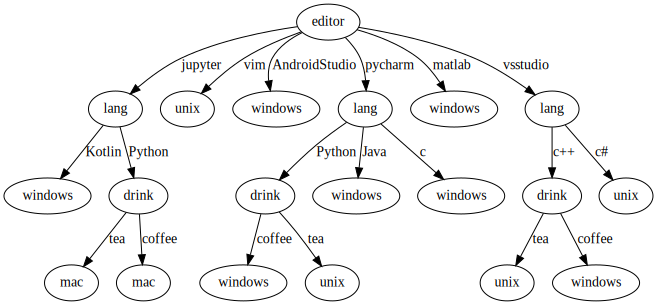

In [575]:
dot